### 환경설정

In [1]:
import os
import warnings

import pandas as pd
import numpy as np


from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

os.chdir(r'C:\Users\a0105\Desktop\DSC\ddd\preprocessing')

### 데이터 불러오기

In [2]:
data_week = pd.read_pickle('data_week_real_final.pkl')

In [3]:
data_week = data_week.iloc[1:,:]
data_week = data_week.reset_index()
del data_week['index']

In [4]:
data_week.columns

Index(['주간날짜', 'breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)',
       '수출 (100만달러)', '수입 (100만달러)', '소비자물가지수 (2010=100)', '수입소고기_총량', '평균기온',
       '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 평균경매 금액_주간평균',
       '돼지 탕박 경매 금액_주간평균', '한우 경매 예상 두수_주간평균', '명절유무', 'resid_week',
       'pig_resid_week', 'y_sd_week', 'y_before_week', 'pig_resid_before_week',
       'cow_ma', 'pig_2_5_ma', 'pig_resid_week_ma', 'cow_resid_week_ma',
       'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no',
       'resid_week_medfilt_3', 'resid_week_medfilt_5'],
      dtype='object')

In [5]:
data_week.dtypes

주간날짜                     datetime64[ns]
breed_cow_sd                    float64
no_breed_cow_sd                 float64
미국소_생산량(가격화한값)                  float64
수출 (100만달러)                       int32
수입 (100만달러)                       int32
소비자물가지수 (2010=100)                int32
수입소고기_총량                          int64
평균기온                            float64
최저기온                            float64
최고기온                            float64
평균지면온도                          float64
최소상대습도(%)                       float64
평균상대습도(%)                       float64
한우 평균경매 금액_주간평균                 float64
돼지 탕박 경매 금액_주간평균                float64
한우 경매 예상 두수_주간평균                float64
명절유무                              int64
resid_week                      float64
pig_resid_week                  float64
y_sd_week                        object
y_before_week                    object
pig_resid_before_week            object
cow_ma                          float64
pig_2_5_ma                      float64


In [6]:
data_week.tail()

,주간날짜,breed_cow_sd,no_breed_cow_sd,미국소_생산량(가격화한값),수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,...,cow_ma,pig_2_5_ma,pig_resid_week_ma,cow_resid_week_ma,cow_resid_diff_week,hampel_resid_week,번식우,번식우_no,resid_week_medfilt_3,resid_week_medfilt_5
291,2018-08-19,190.851852,-70.148148,242960.0,604860,535202,104,42590,25.1,21.3,...,17829.800000,5287.500000,516.062830,0.997980,0.0054191,0.964366,1758,904,0.979869,1.004748
292,2018-08-26,190.851852,-70.148148,242960.0,604860,535202,104,42590,23.2,20.9,...,17970.400000,5393.700000,554.668958,0.999253,-0.058802,0.979869,1758,904,0.979869,1.004748
293,2018-09-02,190.851852,-70.148148,215750.0,604860,535202,104,34151,22.4,19.6,...,18054.600000,5513.700000,698.533985,1.003676,0.0155031,1.004748,1758,904,1.004748,1.004748
294,2018-09-09,190.851852,-70.148148,215750.0,604860,535202,104,34151,19.4,16.0,...,18359.500000,5565.875000,763.337379,1.013503,0.0248786,1.024114,1758,904,1.024114,1.004748
295,2018-09-16,190.851852,-70.148148,215750.0,604860,535202,104,34151,21.1,17.2,...,18627.666667,5685.333333,897.636090,1.024715,0.0193666,1.045282,1758,904,1.024114,1.004748


In [7]:
data_week.isnull().sum()

주간날짜                     0
breed_cow_sd             0
no_breed_cow_sd          0
미국소_생산량(가격화한값)           0
수출 (100만달러)              0
수입 (100만달러)              0
소비자물가지수 (2010=100)       0
수입소고기_총량                 0
평균기온                     0
최저기온                     0
최고기온                     0
평균지면온도                   0
최소상대습도(%)                0
평균상대습도(%)                0
한우 평균경매 금액_주간평균          0
돼지 탕박 경매 금액_주간평균         0
한우 경매 예상 두수_주간평균         0
명절유무                     0
resid_week               0
pig_resid_week           0
y_sd_week                0
y_before_week            0
pig_resid_before_week    0
cow_ma                   0
pig_2_5_ma               0
pig_resid_week_ma        0
cow_resid_week_ma        0
cow_resid_diff_week      0
hampel_resid_week        0
번식우                      0
번식우_no                   0
resid_week_medfilt_3     0
resid_week_medfilt_5     0
dtype: int64

In [8]:
data_week['y_sd_week'] = data_week['y_sd_week'].astype('float')
data_week['y_before_week'] = data_week['y_before_week'].astype('float')
data_week['pig_resid_before_week'] = data_week['pig_resid_before_week'].astype('float')
data_week['cow_resid_diff_week'] = data_week['cow_resid_diff_week'].astype('float')

In [9]:
data_week.columns

Index(['주간날짜', 'breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)',
       '수출 (100만달러)', '수입 (100만달러)', '소비자물가지수 (2010=100)', '수입소고기_총량', '평균기온',
       '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 평균경매 금액_주간평균',
       '돼지 탕박 경매 금액_주간평균', '한우 경매 예상 두수_주간평균', '명절유무', 'resid_week',
       'pig_resid_week', 'y_sd_week', 'y_before_week', 'pig_resid_before_week',
       'cow_ma', 'pig_2_5_ma', 'pig_resid_week_ma', 'cow_resid_week_ma',
       'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no',
       'resid_week_medfilt_3', 'resid_week_medfilt_5'],
      dtype='object')

---

# Modeling1
medfilt 제외: hampel filter를 적용한 결과 전보다 뒤에 값을 잘 맞추지만 첫 구간을 잘 못 맞춤,

In [10]:
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','resid_week','pig_resid_week','pig_resid_before_week','resid_week_medfilt_3','resid_week_medfilt_5'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]
print(features)

['breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)', '수출 (100만달러)', '수입 (100만달러)', '소비자물가지수 (2010=100)', '수입소고기_총량', '평균기온', '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 경매 예상 두수_주간평균', '명절유무', 'y_sd_week', 'y_before_week', 'cow_ma', 'pig_2_5_ma', 'pig_resid_week_ma', 'cow_resid_week_ma', 'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no']


#### MaxAbsScaler

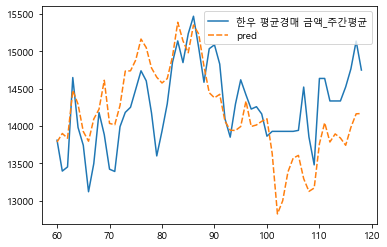

train_acc: 0.9591866762311355
test_acc: -0.03658920211715477
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
-----Fold종료-----


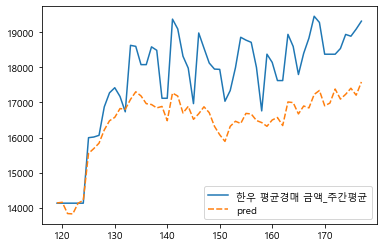

train_acc: 0.9503709045235875
test_acc: 0.07409766838209819
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
-----Fold종료-----


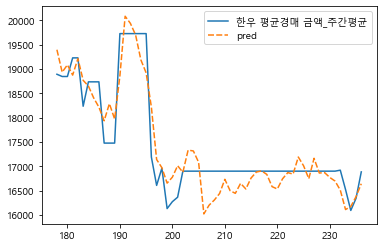

train_acc: 0.9770853581099508
test_acc: 0.8507166118372956
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
-----Fold종료-----


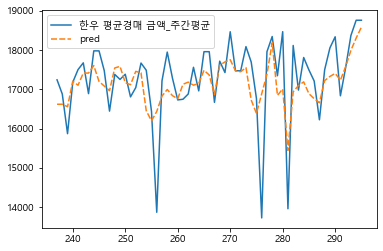

train_acc: 0.9817292077237617
test_acc: 0.4132274596780515
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 

In [11]:
warnings.filterwarnings(action='ignore')

scaler = preprocessing.MaxAbsScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=4)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

#### MinMaxSclaer

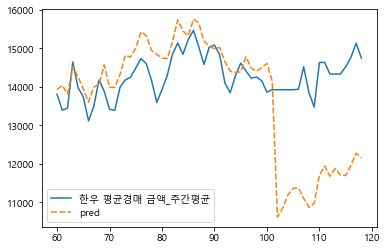

train_acc: 0.9654027956894061
test_acc: -7.8061710897650745
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
-----Fold종료-----


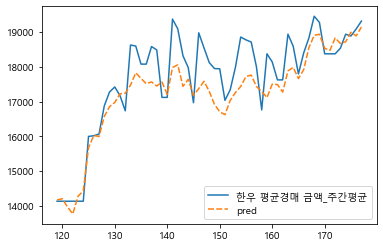

train_acc: 0.9576067962381908
test_acc: 0.7844639518334207
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
-----Fold종료-----


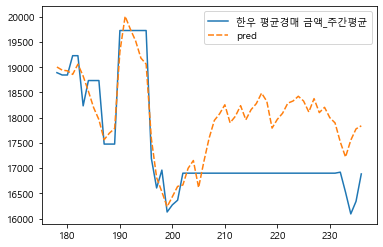

train_acc: 0.9804182359385618
test_acc: 0.2923833448225007
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
-----Fold종료-----


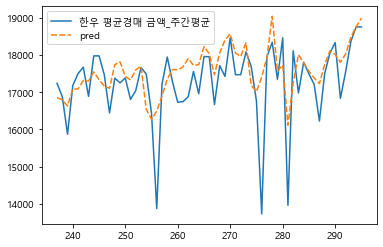

train_acc: 0.9783709445567066
test_acc: 0.2996161142238346
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 

In [12]:
warnings.filterwarnings(action='ignore')

scaler = preprocessing.MinMaxScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=4)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

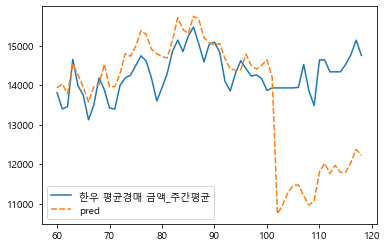

train_acc: 0.9656179235615394
test_acc: -7.236478017291573
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
-----Fold종료-----


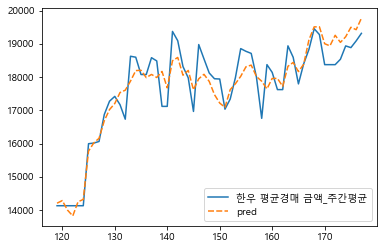

train_acc: 0.9620816387322841
test_acc: 0.8882636422406373
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
-----Fold종료-----


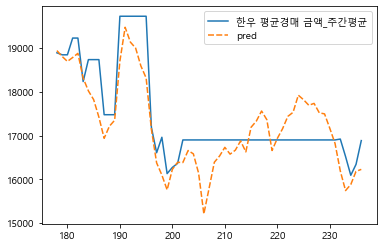

train_acc: 0.9650705370360019
test_acc: 0.6589380701114742
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
-----Fold종료-----


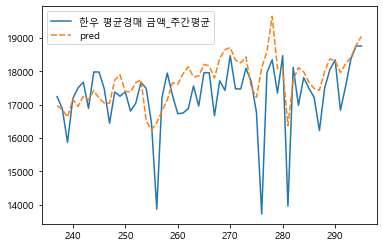

train_acc: 0.966127161944158
test_acc: 0.06323595626645417
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 

In [13]:
warnings.filterwarnings(action='ignore')

scaler = preprocessing.StandardScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=4)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

* MaxAbs가 가장 좋음.
---

# Modeling2
pig 관련 변수 모두 제거 

In [22]:
data_week.columns

Index(['주간날짜', 'breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)',
       '수출 (100만달러)', '수입 (100만달러)', '소비자물가지수 (2010=100)', '수입소고기_총량', '평균기온',
       '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 평균경매 금액_주간평균',
       '돼지 탕박 경매 금액_주간평균', '한우 경매 예상 두수_주간평균', '명절유무', 'resid_week',
       'pig_resid_week', 'y_sd_week', 'y_before_week', 'pig_resid_before_week',
       'cow_ma', 'pig_2_5_ma', 'pig_resid_week_ma', 'cow_resid_week_ma',
       'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no',
       'resid_week_medfilt_3', 'resid_week_medfilt_5'],
      dtype='object')

In [29]:
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','pig_2_5_ma','pig_resid_week_ma','resid_week','resid_week_medfilt_3','pig_resid_week','pig_resid_before_week','resid_week_medfilt_5'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]
features

['breed_cow_sd',
 'no_breed_cow_sd',
 '미국소_생산량(가격화한값)',
 '수출 (100만달러)',
 '수입 (100만달러)',
 '소비자물가지수 (2010=100)',
 '수입소고기_총량',
 '평균기온',
 '최저기온',
 '최고기온',
 '평균지면온도',
 '최소상대습도(%)',
 '평균상대습도(%)',
 '한우 경매 예상 두수_주간평균',
 '명절유무',
 'y_sd_week',
 'y_before_week',
 'cow_ma',
 'cow_resid_week_ma',
 'cow_resid_diff_week',
 'hampel_resid_week',
 '번식우',
 '번식우_no']

In [30]:
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','resid_week','pig_resid_week','pig_resid_before_week','pig_2_5_ma','pig_resid_week_ma','resid_week_medfilt_3','resid_week_medfilt_5'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]
print(features)

['breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)', '수출 (100만달러)', '수입 (100만달러)', '소비자물가지수 (2010=100)', '수입소고기_총량', '평균기온', '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 경매 예상 두수_주간평균', '명절유무', 'y_sd_week', 'y_before_week', 'cow_ma', 'cow_resid_week_ma', 'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no']


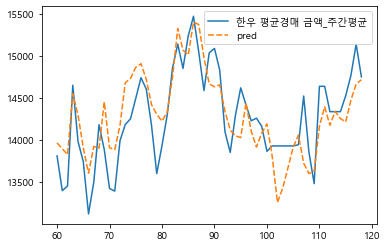

train_acc: 0.9635816113337686
test_acc: 0.5756520845043691
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
-----Fold종료-----


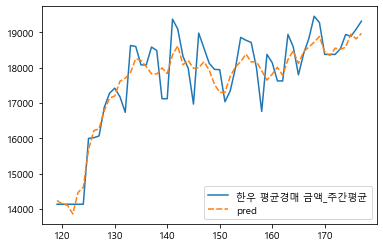

train_acc: 0.952734026025175
test_acc: 0.8871871829766578
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
-----Fold종료-----


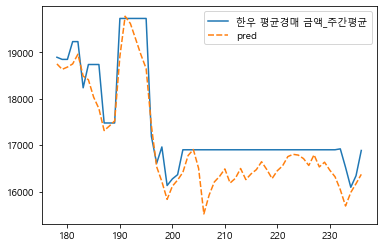

train_acc: 0.9802069365830174
test_acc: 0.7758551061316515
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
-----Fold종료-----


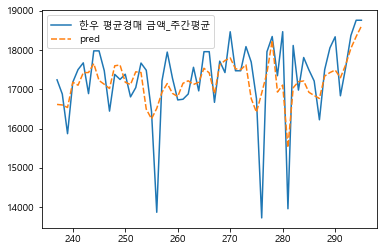

train_acc: 0.9816831509928735
test_acc: 0.4305473085947713
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 

In [33]:
warnings.filterwarnings(action='ignore')

scaler = preprocessing.MaxAbsScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=4)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

0.33 -> 0.67

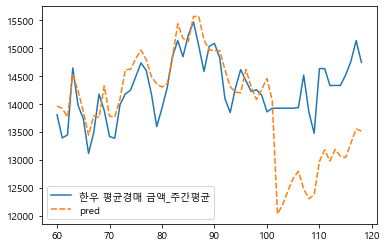

train_acc: 0.9656851515171085
test_acc: -1.5442116645600468
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
-----Fold종료-----


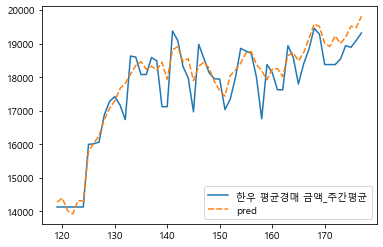

train_acc: 0.9631654557698501
test_acc: 0.8853960783477525
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
-----Fold종료-----


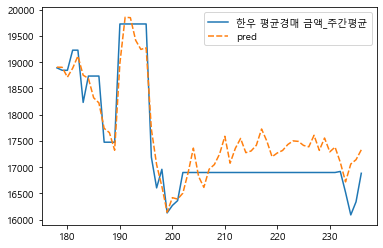

train_acc: 0.983728029857085
test_acc: 0.8331505730671637
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
-----Fold종료-----


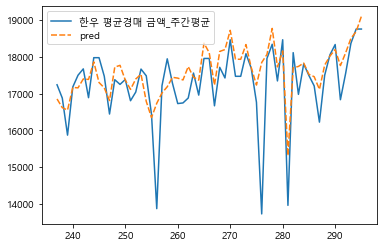

train_acc: 0.9836322757848414
test_acc: 0.3567413168360173
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 

In [25]:
warnings.filterwarnings(action='ignore')

scaler = preprocessing.MinMaxScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=4)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

* pig관련 변수를 제거하면 0.33에서 0.67까지 올라감.
* MaxAbs가 성능이 더 좋음 

___
# Modeling3
hamel filter대신 medianfilt 관련 파생 변수 적용

#### resid_week_medfilt_5 적용 

In [38]:
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','pig_resid_week_ma','pig_2_5_ma','resid_week','hampel_resid_week','pig_resid_week','pig_resid_before_week','resid_week_medfilt_3'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]
features

['breed_cow_sd',
 'no_breed_cow_sd',
 '미국소_생산량(가격화한값)',
 '수출 (100만달러)',
 '수입 (100만달러)',
 '소비자물가지수 (2010=100)',
 '수입소고기_총량',
 '평균기온',
 '최저기온',
 '최고기온',
 '평균지면온도',
 '최소상대습도(%)',
 '평균상대습도(%)',
 '한우 경매 예상 두수_주간평균',
 '명절유무',
 'y_sd_week',
 'y_before_week',
 'cow_ma',
 'cow_resid_week_ma',
 'cow_resid_diff_week',
 '번식우',
 '번식우_no',
 'resid_week_medfilt_5']

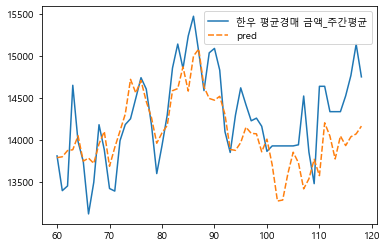

train_acc: 0.9468606268418055
test_acc: 0.2970621368193701
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
-----Fold종료-----


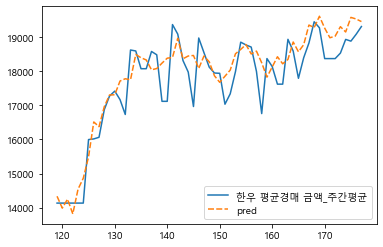

train_acc: 0.9421317239221407
test_acc: 0.827474472141479
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
-----Fold종료-----


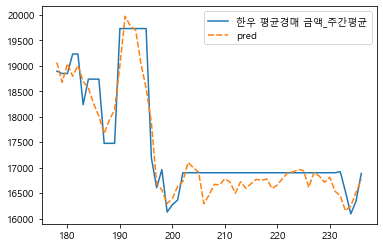

train_acc: 0.9739520941131272
test_acc: 0.8931383654643003
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
-----Fold종료-----


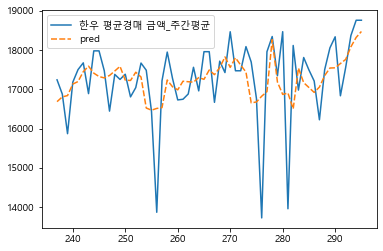

train_acc: 0.977007289827127
test_acc: 0.22552622867029193
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 

In [40]:
warnings.filterwarnings(action='ignore')

scaler = preprocessing.MaxAbsScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=4)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

#### resid_week_medfilt_3 적용

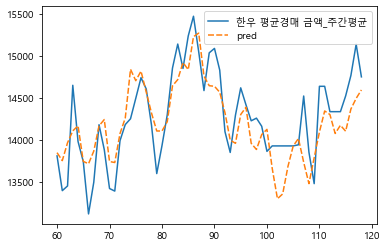

train_acc: 0.9592984594870326
test_acc: 0.5891460412198045
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
-----Fold종료-----


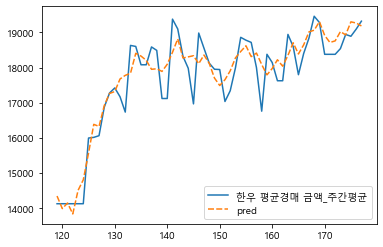

train_acc: 0.9471786000310389
test_acc: 0.876438134101985
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
-----Fold종료-----


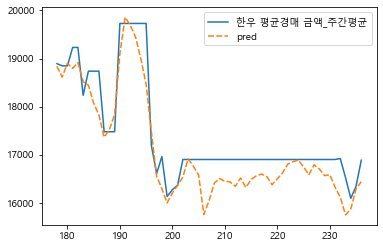

train_acc: 0.977973351649763
test_acc: 0.8195561614937181
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
-----Fold종료-----


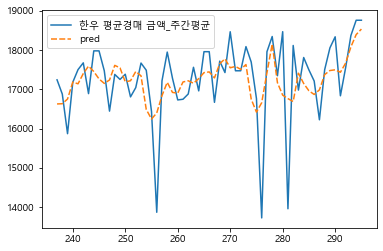

train_acc: 0.9799237486433962
test_acc: 0.3078026016217753
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 

In [41]:
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','pig_2_5_ma','pig_resid_week_ma','resid_week','hampel_resid_week','pig_resid_week','pig_resid_before_week','resid_week_medfilt_5'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]
warnings.filterwarnings(action='ignore')

scaler = preprocessing.MaxAbsScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=4)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

0.67에서 0.65로 줄어듦.

In [56]:
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','pig_2_5_ma','pig_resid_week_ma','resid_week','pig_resid_week','pig_resid_before_week','resid_week_medfilt_5'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]

print(features)

['breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)', '수출 (100만달러)', '수입 (100만달러)', '소비자물가지수 (2010=100)', '수입소고기_총량', '평균기온', '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 경매 예상 두수_주간평균', '명절유무', 'y_sd_week', 'y_before_week', 'cow_ma', 'cow_resid_week_ma', 'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no', 'resid_week_medfilt_3']


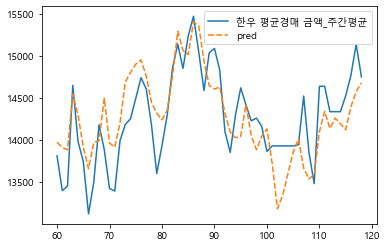

train_acc: 0.9633780341626816
test_acc: 0.5056665403433582
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
-----Fold종료-----


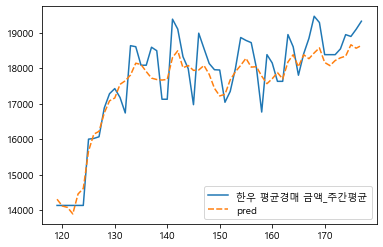

train_acc: 0.9523005665225112
test_acc: 0.8645669298203473
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
-----Fold종료-----


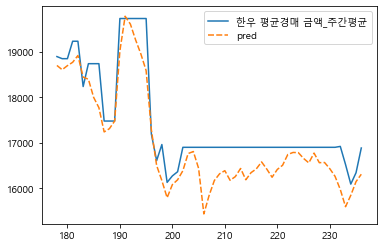

train_acc: 0.9805933428061403
test_acc: 0.7473302328278064
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
-----Fold종료-----


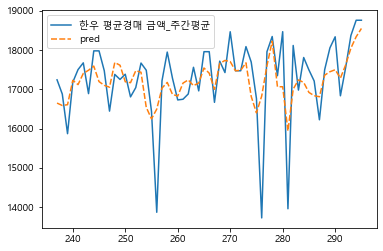

train_acc: 0.9820997643640869
test_acc: 0.40925464503272035
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231

In [44]:
scaler = preprocessing.MaxAbsScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=4)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

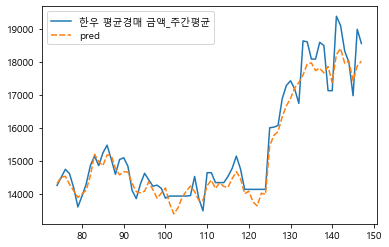

train_acc: 0.9599844879881063
test_acc: 0.9378326139910446
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


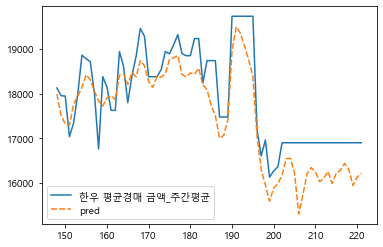

train_acc: 0.9731769146984379
test_acc: 0.6349734729941638
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


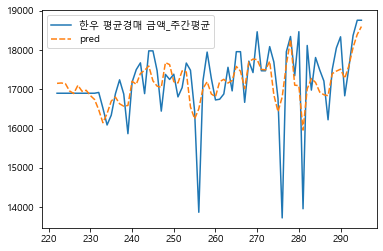

train_acc: 0.9822900063482187
test_acc: 0.4413640608137548
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.6713900492663211


In [49]:
scaler = preprocessing.MaxAbsScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=3)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

#### n_component 16- 17증가

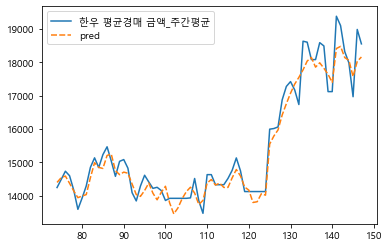

train_acc: 0.9637262240151633
test_acc: 0.9531426596434295
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


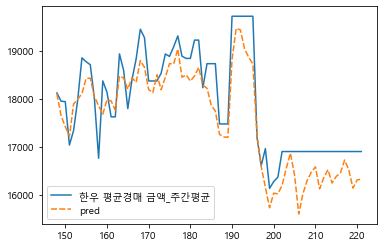

train_acc: 0.9770288393356066
test_acc: 0.738314029459225
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


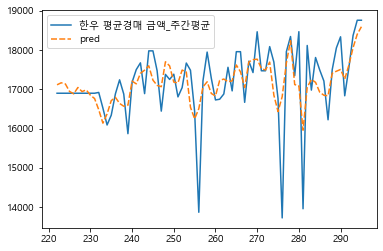

train_acc: 0.9823359278487234
test_acc: 0.4427602418391592
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7114056436472712


In [58]:
scaler = preprocessing.MaxAbsScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=3)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=17,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

#### hampel filter만 넣고 n_component 17, split=3

In [59]:
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','pig_2_5_ma','pig_resid_week_ma','resid_week','pig_resid_week','pig_resid_before_week','resid_week_medfilt_3', 'resid_week_medfilt_5'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]

print(features)

['breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)', '수출 (100만달러)', '수입 (100만달러)', '소비자물가지수 (2010=100)', '수입소고기_총량', '평균기온', '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 경매 예상 두수_주간평균', '명절유무', 'y_sd_week', 'y_before_week', 'cow_ma', 'cow_resid_week_ma', 'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no']


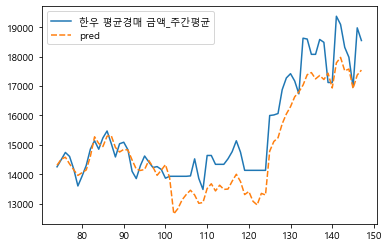

train_acc: 0.9617973610103634
test_acc: 0.7813476281875344
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


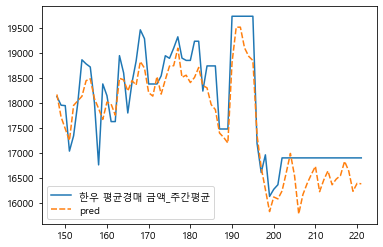

train_acc: 0.97745858771794
test_acc: 0.7851302733192065
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


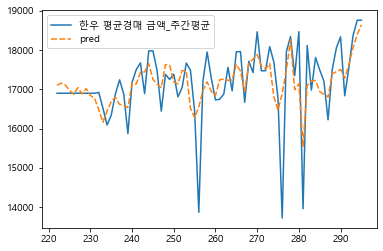

train_acc: 0.9819359802344185
test_acc: 0.463843880619747
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.6767739273754959


In [60]:
scaler = preprocessing.MaxAbsScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=3)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=17,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

hampel과 med둘 다 사용하면 0.68에서 0.71로 증가(n_split = 3, n_component = 17기준[16이 더 낮음 0.68])

### Modeling4
수입 수출 지표 제거 

In [76]:
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','pig_2_5_ma','pig_resid_week_ma','resid_week','pig_resid_week','pig_resid_before_week','resid_week_medfilt_5','수출 (100만달러)','수입 (100만달러)'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]

print(features)

['breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)', '소비자물가지수 (2010=100)', '수입소고기_총량', '평균기온', '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 경매 예상 두수_주간평균', '명절유무', 'y_sd_week', 'y_before_week', 'cow_ma', 'cow_resid_week_ma', 'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no', 'resid_week_medfilt_3']


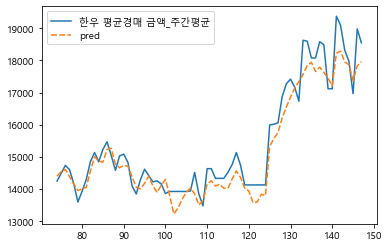

train_acc: 0.9639056253910091
test_acc: 0.9274593506922214
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


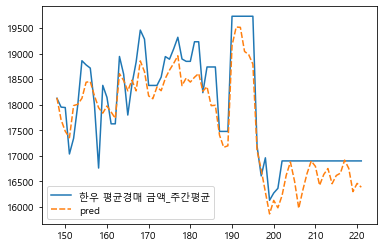

train_acc: 0.9799464871495441
test_acc: 0.8134091468616566
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


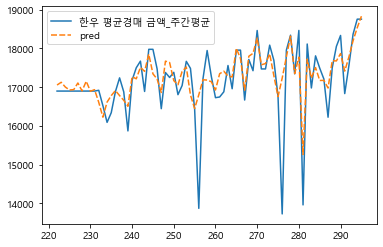

train_acc: 0.9848018123236537
test_acc: 0.5133820426020744
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7514168467186507


In [77]:
scaler = preprocessing.MaxAbsScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=3)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=17,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

* 수출, 수입 지표를 제거하면 0.71-> 0.75로 증가
* 경제 지표 중 소비자 물가만 제거하면 0.70으로 낮아짐.
* 모든 경제 지표를 제거하면 0.74로 낮아짐. (소비자물가지수 남기기)

### Modeling5
미국소 생산량과 수입소고기_총량 조절하기

In [78]:
# 수입소고기 총량 제거 0.7585
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','pig_2_5_ma','pig_resid_week_ma','resid_week','pig_resid_week','pig_resid_before_week','resid_week_medfilt_5','수입소고기_총량', '수출 (100만달러)', '수입 (100만달러)'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]

print(features)

['breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)', '소비자물가지수 (2010=100)', '평균기온', '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 경매 예상 두수_주간평균', '명절유무', 'y_sd_week', 'y_before_week', 'cow_ma', 'cow_resid_week_ma', 'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no', 'resid_week_medfilt_3']


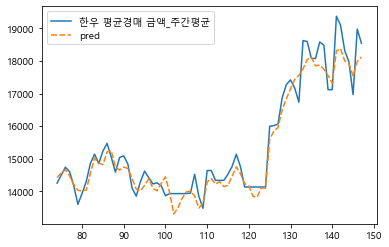

train_acc: 0.9636762940392997
test_acc: 0.9479287282087953
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


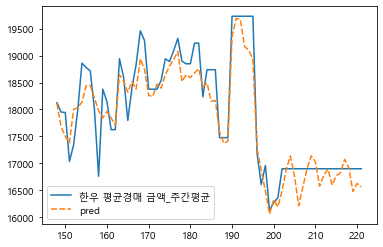

train_acc: 0.979850874584104
test_acc: 0.8765161737587882
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


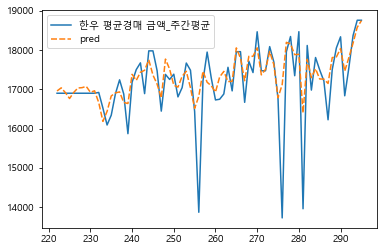

train_acc: 0.9866636299935181
test_acc: 0.4511642502908382
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7585363840861405


In [79]:
scaler = preprocessing.MaxAbsScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=3)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=17,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

In [82]:
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','pig_2_5_ma','pig_resid_week_ma','resid_week','수입소고기_총량','pig_resid_week','pig_resid_before_week','resid_week_medfilt_5','미국소_생산량(가격화한값)', '수출 (100만달러)', '수입 (100만달러)'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]

print(features)

['breed_cow_sd', 'no_breed_cow_sd', '소비자물가지수 (2010=100)', '평균기온', '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 경매 예상 두수_주간평균', '명절유무', 'y_sd_week', 'y_before_week', 'cow_ma', 'cow_resid_week_ma', 'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no', 'resid_week_medfilt_3']


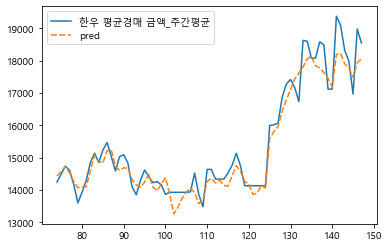

train_acc: 0.9614867182943891
test_acc: 0.9429201540477742
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


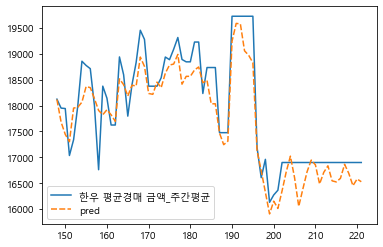

train_acc: 0.9789664567969816
test_acc: 0.8450798327670334
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


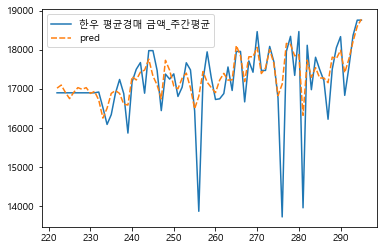

train_acc: 0.9864451126906536
test_acc: 0.4617071951867665
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7499023940005247


In [83]:
scaler = preprocessing.MaxAbsScaler() # Abscaler 써보기

tss = TimeSeriesSplit(n_splits=3)

accrs = []

for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=17,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[218, 32, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1)
    model.fit(train_x, train_y)
    
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred

    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    
    print('train_acc:',train_accr)
    print('test_acc:',test_accr)
    print(train_idx)
    print('-----Fold종료-----')

    accrs.append(test_accr)
    
print(np.average(accrs))

* 미국소고기 가격을 제거하면 0.7413으로 떨어짐 
* 미국소고기 가격과 수입소고기 총량 모두 제거하면 0.7499로 떨어짐
* 미국소고기 가격은 남기기 

---
# Modeling6
파라미터 조절

In [85]:
# 수입소고기 총량 제거 0.7585
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','pig_2_5_ma','pig_resid_week_ma','resid_week','pig_resid_week','pig_resid_before_week','resid_week_medfilt_5','수입소고기_총량', '수출 (100만달러)', '수입 (100만달러)'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]

print(features)

['breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)', '소비자물가지수 (2010=100)', '평균기온', '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 경매 예상 두수_주간평균', '명절유무', 'y_sd_week', 'y_before_week', 'cow_ma', 'cow_resid_week_ma', 'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no', 'resid_week_medfilt_3']


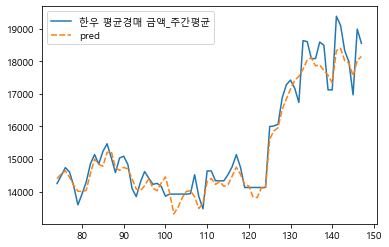

train_acc : 0.9634574532000761
test_acc : 0.9489504636451103
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


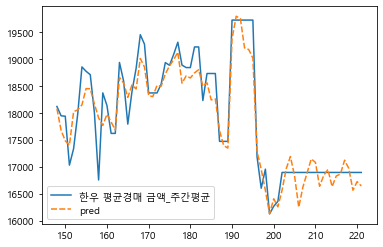

train_acc : 0.979981562359181
test_acc : 0.8955037247582996
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


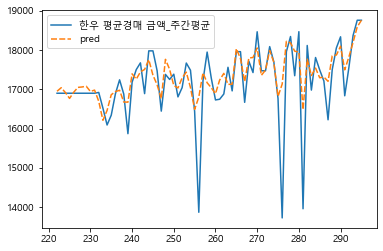

train_acc : 0.9866554516936508
test_acc : 0.4442831841898467
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7629124575310856


In [89]:
from sklearn.decomposition import PCA
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MaxAbsScaler()
tss = TimeSeriesSplit(n_splits=3)
accrs = []


for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=17,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    # 64는 더 안좋아짐
    model = MLPRegressor(hidden_layer_sizes=[256, 128, 24], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
        
    test_acc = model.score(test_x, test_y)
    train_acc = model.score(train_x, train_y)
    print("train_acc :",train_acc)
    print("test_acc :", test_acc)
    print(train_idx)
    print('-----Fold종료-----')
    accrs.append(test_acc)
    
print(np.average(accrs))

* 파라미터 조정으로 0.75에서 0.76으로 상승


In [112]:
# 수입소고기 총량 제거 0.7585
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','pig_2_5_ma','pig_resid_week_ma','resid_week','pig_resid_week','pig_resid_before_week','resid_week_medfilt_5','수입소고기_총량', '수출 (100만달러)', '수입 (100만달러)'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]

print(features)

['breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)', '소비자물가지수 (2010=100)', '평균기온', '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 경매 예상 두수_주간평균', '명절유무', 'y_sd_week', 'y_before_week', 'cow_ma', 'cow_resid_week_ma', 'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no', 'resid_week_medfilt_3']


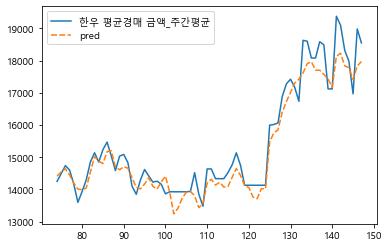

train_acc : 0.9628586897273979
test_acc : 0.9321884283263485
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


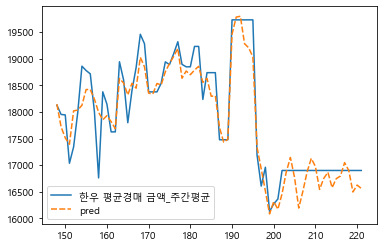

train_acc : 0.9794701781040869
test_acc : 0.8917646356181748
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


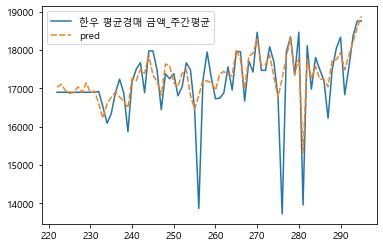

train_acc : 0.9845957614397302
test_acc : 0.507289851970133
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7770809719715522


In [115]:
from sklearn.decomposition import PCA
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MaxAbsScaler()
tss = TimeSeriesSplit(n_splits=3)
accrs = []


for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    # 64는 더 안좋아짐
    
    #0.7683
    #model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                        #batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
        
    test_acc = model.score(test_x, test_y)
    train_acc = model.score(train_x, train_y)
    print("train_acc :",train_acc)
    print("test_acc :", test_acc)
    print(train_idx)
    print('-----Fold종료-----')
    accrs.append(test_acc)
    
print(np.average(accrs))

In [124]:
# 수입소고기 총량 제거 0.7585
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','pig_2_5_ma','pig_resid_week_ma','resid_week','pig_resid_week','pig_resid_before_week','명절유무','resid_week_medfilt_5','수입소고기_총량', '수출 (100만달러)', '수입 (100만달러)'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]

print(features)

['breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)', '소비자물가지수 (2010=100)', '평균기온', '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 경매 예상 두수_주간평균', 'y_sd_week', 'y_before_week', 'cow_ma', 'cow_resid_week_ma', 'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no', 'resid_week_medfilt_3']


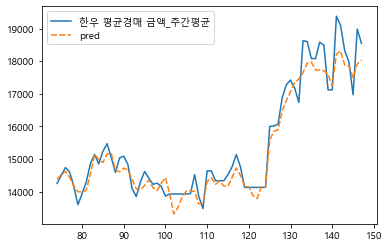

train_acc : 0.9620981229559663
test_acc : 0.9434408134620298
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


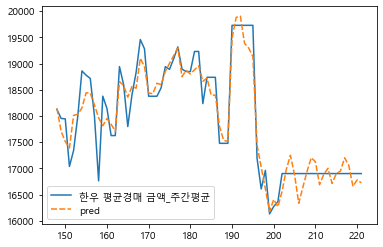

train_acc : 0.9796244781419279
test_acc : 0.9080724688674576
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


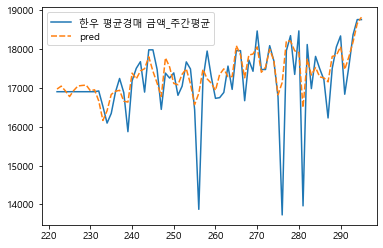

train_acc : 0.9866015052461039
test_acc : 0.43830444285540116
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7632725750616296


In [125]:
from sklearn.decomposition import PCA
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MaxAbsScaler()
tss = TimeSeriesSplit(n_splits=3)
accrs = []


for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)   # 15는 ㄴㄴ
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    # 64는 더 안좋아짐
    
    #0.7683
    #model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                        #batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
        
    test_acc = model.score(test_x, test_y)
    train_acc = model.score(train_x, train_y)
    print("train_acc :",train_acc)
    print("test_acc :", test_acc)
    print(train_idx)
    print('-----Fold종료-----')
    accrs.append(test_acc)
    
print(np.average(accrs))

* 명절유무 제거하면 더 낮아짐.

['breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)', '소비자물가지수 (2010=100)', '평균기온', '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 경매 예상 두수_주간평균', '명절유무', 'y_sd_week', 'y_before_week', 'cow_ma', 'cow_resid_week_ma', 'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no']


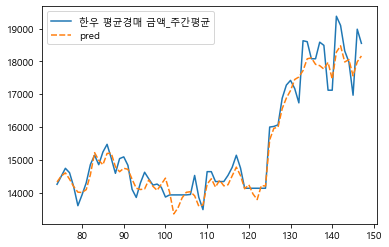

train_acc : 0.9605970381512647
test_acc : 0.9473934300431998
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


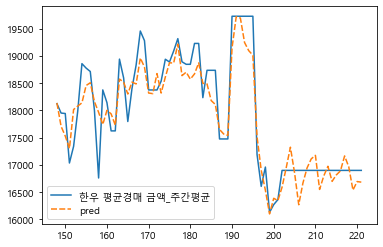

train_acc : 0.9770837933709393
test_acc : 0.8804559792203925
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


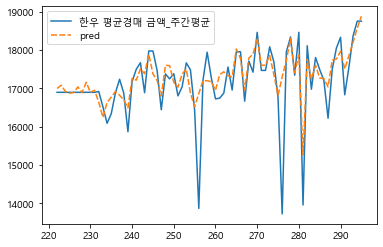

train_acc : 0.9847392412222155
test_acc : 0.5086078107953309
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7788190733529744


In [127]:
# 수입소고기 총량 제거 0.7585
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','pig_2_5_ma','pig_resid_week_ma','resid_week','pig_resid_week','pig_resid_before_week','resid_week_medfilt_3','resid_week_medfilt_5','수입소고기_총량', '수출 (100만달러)', '수입 (100만달러)'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]

print(features)

from sklearn.decomposition import PCA
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MaxAbsScaler()
tss = TimeSeriesSplit(n_splits=3)
accrs = []


for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)   # 15는 ㄴㄴ
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    # 64는 더 안좋아짐
    
    #0.7683
    #model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                        #batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
        
    test_acc = model.score(test_x, test_y)
    train_acc = model.score(train_x, train_y)
    print("train_acc :",train_acc)
    print("test_acc :", test_acc)
    print(train_idx)
    print('-----Fold종료-----')
    accrs.append(test_acc)
    
print(np.average(accrs))

### Modeling7
기상변수 조정

In [122]:
data_names = data_week.drop(['주간날짜','한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균','평균상대습도(%)','pig_2_5_ma','pig_resid_week_ma','resid_week','pig_resid_week','pig_resid_before_week','resid_week_medfilt_5','수입소고기_총량', '수출 (100만달러)', '수입 (100만달러)'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]

print(features)

['breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)', '소비자물가지수 (2010=100)', '평균기온', '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '한우 경매 예상 두수_주간평균', '명절유무', 'y_sd_week', 'y_before_week', 'cow_ma', 'cow_resid_week_ma', 'cow_resid_diff_week', 'hampel_resid_week', '번식우', '번식우_no', 'resid_week_medfilt_3']


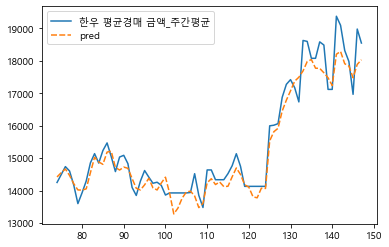

train_acc : 0.9629449792633558
test_acc : 0.9405179343598222
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


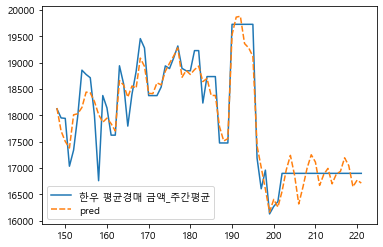

train_acc : 0.9795971454278424
test_acc : 0.9055435931652973
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


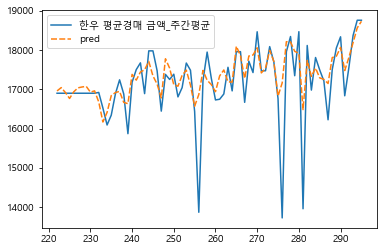

train_acc : 0.9866625773709802
test_acc : 0.432989287841833
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7596836051223175


In [123]:
from sklearn.decomposition import PCA
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MaxAbsScaler()
tss = TimeSeriesSplit(n_splits=3)
accrs = []


for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    # 64는 더 안좋아짐
    
    #0.7683
    #model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                        #batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
        
    test_acc = model.score(test_x, test_y)
    train_acc = model.score(train_x, train_y)
    print("train_acc :",train_acc)
    print("test_acc :", test_acc)
    print(train_idx)
    print('-----Fold종료-----')
    accrs.append(test_acc)
    
print(np.average(accrs))

# Modeling: 0.78

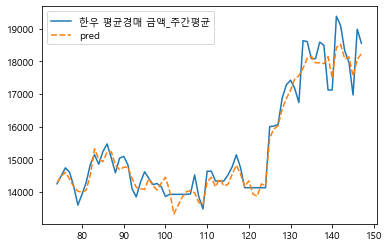

train_acc : 0.960509299824859
test_acc : 0.9514205492884105
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


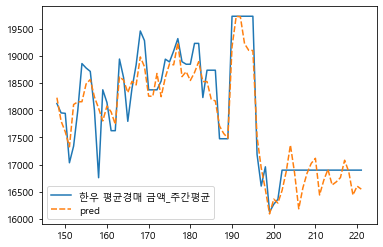

train_acc : 0.977237423214702
test_acc : 0.8734794565559013
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


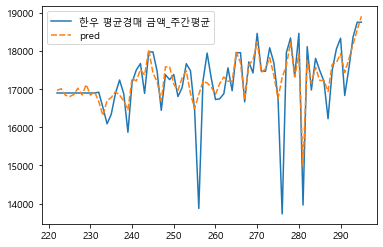

train_acc : 0.984630563872898
test_acc : 0.5323033754201565
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7857344604214894


In [99]:
features = ['cow_resid_week_ma','cow_resid_diff_week','breed_cow_sd','no_breed_cow_sd','번식우','번식우_no','한우 경매 예상 두수_주간평균',
            'cow_ma','cow_resid_diff_week','hampel_resid_week','최고기온','평균지면온도','y_sd_week','y_before_week',
           '미국소_생산량(가격화한값)','최소상대습도(%)']

from sklearn.decomposition import PCA
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MinMaxScaler()
tss = TimeSeriesSplit(n_splits=3)
accrs = []


for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=14,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    # 64는 더 안좋아짐
    model = MLPRegressor(hidden_layer_sizes=[256, 128, 24], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
        
    test_acc = model.score(test_x, test_y)
    train_acc = model.score(train_x, train_y)
    print("train_acc :",train_acc)
    print("test_acc :", test_acc)
    print(train_idx)
    print('-----Fold종료-----')
    accrs.append(test_acc)
    
print(np.average(accrs))

#### 미국소 생산량 제거 후 명절 유무 넣음

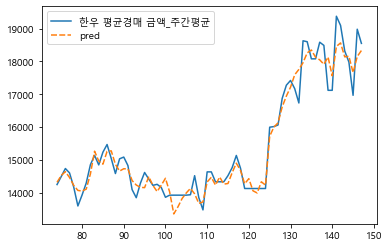

train_acc : 0.959282813014602
test_acc : 0.9537627343295082
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


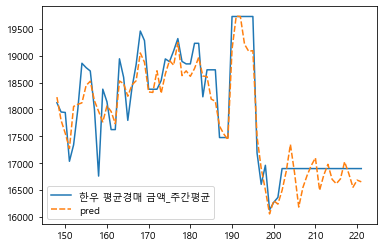

train_acc : 0.9767798539965485
test_acc : 0.8809795354704384
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


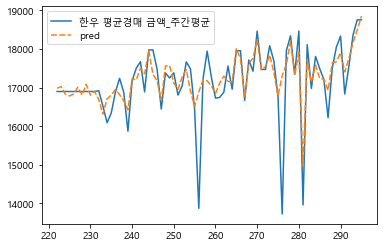

train_acc : 0.9846864996804969
test_acc : 0.5310493835410395
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7885972177803288


In [102]:

features = ['cow_resid_week_ma','cow_resid_diff_week','breed_cow_sd','no_breed_cow_sd','번식우','번식우_no','한우 경매 예상 두수_주간평균',
            'cow_ma','hampel_resid_week','최고기온','평균지면온도','y_sd_week','y_before_week',
           '명절유무','최소상대습도(%)']

from sklearn.decomposition import PCA
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MinMaxScaler()
tss = TimeSeriesSplit(n_splits=3)
accrs = []


for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=14,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    # 64는 더 안좋아짐
    model = MLPRegressor(hidden_layer_sizes=[256, 128, 24], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
        
    test_acc = model.score(test_x, test_y)
    train_acc = model.score(train_x, train_y)
    print("train_acc :",train_acc)
    print("test_acc :", test_acc)
    print(train_idx)
    print('-----Fold종료-----')
    accrs.append(test_acc)
    
print(np.average(accrs))

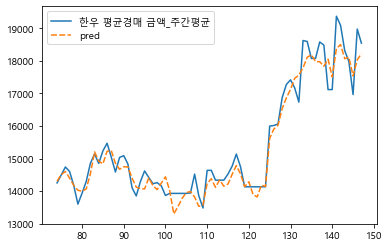

train_acc : 0.9611665399960309
test_acc : 0.9483967901103598
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


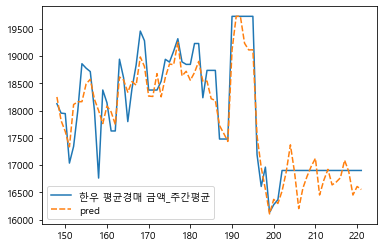

train_acc : 0.9773005038839387
test_acc : 0.8745942246900875
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


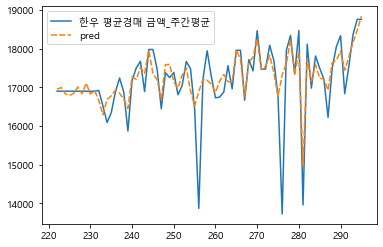

train_acc : 0.9847612123468579
test_acc : 0.5278571878098951
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7836160675367808


In [108]:

features = ['cow_resid_week_ma','cow_resid_diff_week','breed_cow_sd','no_breed_cow_sd','번식우','번식우_no','한우 경매 예상 두수_주간평균',
            'cow_ma','hampel_resid_week','최고기온','평균지면온도','y_sd_week','y_before_week','미국소_생산량(가격화한값)',
           '명절유무','최소상대습도(%)']

from sklearn.decomposition import PCA
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MinMaxScaler()
tss = TimeSeriesSplit(n_splits=3)
accrs = []


for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=14,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    # 64는 더 안좋아짐
    model = MLPRegressor(hidden_layer_sizes=[256, 128, 24], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
        
    test_acc = model.score(test_x, test_y)
    train_acc = model.score(train_x, train_y)
    print("train_acc :",train_acc)
    print("test_acc :", test_acc)
    print(train_idx)
    print('-----Fold종료-----')
    accrs.append(test_acc)
    
print(np.average(accrs))

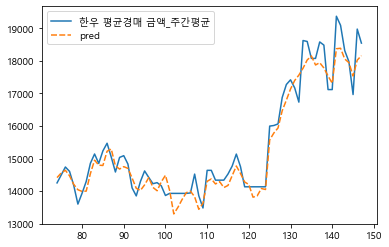

train_acc : 0.9640783661169166
test_acc : 0.9484158386614375
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
-----Fold종료-----


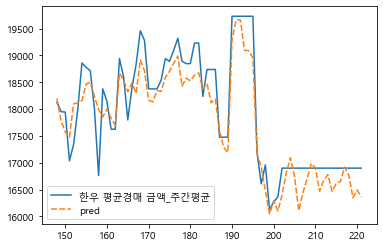

train_acc : 0.9801803768583537
test_acc : 0.850944049559758
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]
-----Fold종료-----


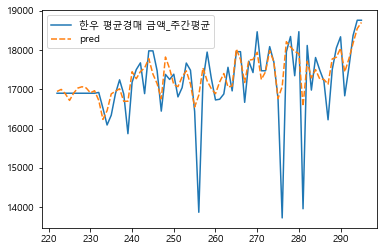

train_acc : 0.9867302469497081
test_acc : 0.4398863643162506
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
-----Fold종료-----
0.7464154175124821


In [110]:
features = ['cow_resid_week_ma','cow_resid_diff_week','breed_cow_sd','no_breed_cow_sd','번식우','번식우_no','한우 경매 예상 두수_주간평균',
            'cow_ma','hampel_resid_week','최고기온','평균지면온도','y_sd_week','y_before_week','미국소_생산량(가격화한값)','resid_week_medfilt_3',
           '명절유무','최소상대습도(%)']

from sklearn.decomposition import PCA
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MinMaxScaler()
tss = TimeSeriesSplit(n_splits=3)
accrs = []


for train_idx, test_idx in tss.split(data_week):
    train_d, test_d = data_week.iloc[train_idx], data_week.iloc[test_idx]
    
    pca = PCA(n_components=15,random_state=1)
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    # 64는 더 안좋아짐
    model = MLPRegressor(hidden_layer_sizes=[256, 128, 24], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우 평균경매 금액_주간평균','pred']])
    plt.show()
        
    test_acc = model.score(test_x, test_y)
    train_acc = model.score(train_x, train_y)
    print("train_acc :",train_acc)
    print("test_acc :", test_acc)
    print(train_idx)
    print('-----Fold종료-----')
    accrs.append(test_acc)
    
print(np.average(accrs))